## Assignment 2 - Pandas, Web Scrapping, APIs, and SQL


This assignment contains 3 questions with details as below. 
The due date is March 16 (Wednesday), 2022, at 11:59 PM. Each late day will result in a 20% loss of total points. 

You need to **submit the notebook .ipynb file** (questions 1 and 2)  and the **.sql file** (with the answers for question 3). Please, save them with your number (e.g. xxxxx.ipynb where xxxxx is your number).

Good work!



## Question 1 (30 points) Call Me Maybe?


![telemarketing](https://neilpatel.com/wp-content/uploads/2019/08/profissional-de-telemarketing-sorridente.jpeg)

Telemarketing is a method of direct marketing in which a salesperson solicits prospective customers to buy products or services over the phone. It has become one of the most widely used marketing campaign methods to engage customers with product and service opportunities. We have collected real data from a Portuguese retail bank, from May 2008 to June 2013, with thousands of phone contacts. 


As the data scientist, you are given the task **to examine the information about telemarketing campaign to contact the customers** Typically, Often, more than one contact to the same client was required, to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 


**Telemarketing Dataset (bank.csv)**
All customers are contained in the file bank.csv. Each line of this file after the header row represents one customer of the Portuguese bank and has the following format:

### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'primary', 'secondary', 'tertiary')
- balance: amcount of bank account balance
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown').

### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone', 'unknown')
- day: last contact day of month
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 

### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes the last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y - has the client subscribed to a term deposit? (binary: 'yes','no').


Answer the following questions using the provided dataset. You can write down intermediate results towards the final answers.

In [35]:
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [36]:
info = pd.read_csv("bank.csv",sep=';')
info

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### Question 1.1 

Across customers' `age, marital_status, job and education` levels, show the <strong>top 10</strong> customers with the highest average bank account balance.

In [37]:
info_1 = info[["age", "job", "marital", "education","balance"]].copy()
info_1.nlargest(n = 10, columns=["balance"])

,age,job,marital,education,balance
3700,60,retired,married,primary,71188
2989,42,entrepreneur,married,tertiary,42045
1483,43,technician,single,tertiary,27733
1881,36,management,married,tertiary,27359
3830,57,technician,married,tertiary,27069
871,31,housemaid,single,primary,26965
4047,75,retired,married,secondary,26452
3011,50,services,married,secondary,26394
2196,54,management,divorced,tertiary,26306
1031,49,retired,single,primary,25824


### Question 1.2 

What's the difference between the average number of contacted customers ("campaign") who subscribed to the term deposit and those who did not subscribe to the term deposit? What do you find?

In [38]:
yno = info.loc[info["y"] == "no"]
yyes = info.loc[info["y"] == "yes"]

difference = yno["campaign"].mean() - yyes["campaign"].mean()
difference

0.5954553742802302

### Question 1.3

Show the subscription rate of customers across groups of marital status, contact channel (cellular, telephone), and whether the customer has a personal loan (yes, no). What's the subscription rate of the segment of customers that are married, with cellular, and have no loan?

In [56]:
info_3 = info[["marital", "contact","loan","y"]].copy()
info_3
info_3_conditions = info_3.loc[(info_3["marital"]=="married") & (info_3["contact"]=="cellular") & (info_3["loan"]=="no")]
subscription_rate = info_3_conditions.count() / info_3.count()
subscription_rate

marital    0.320062
contact    0.320062
loan       0.320062
y          0.320062
dtype: float64

### Question 1.4

Show the relationship between the number of "campaign" performed to the customer and his/her subscription rate, across groups of education level (primary, secondary, tertiary), and whether the customer has a housing loan (yes, no). Remove the unknown value in education and housing before you perform the analysis. What do you conclude?

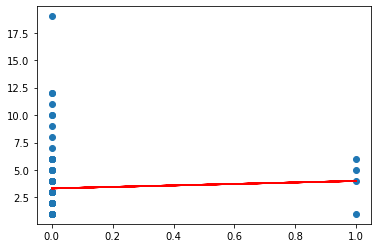

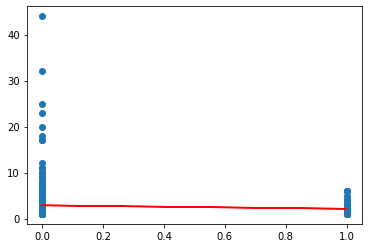

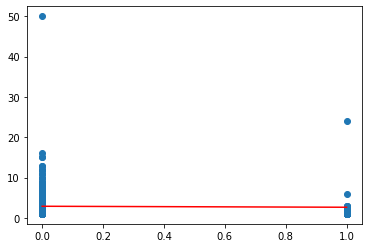

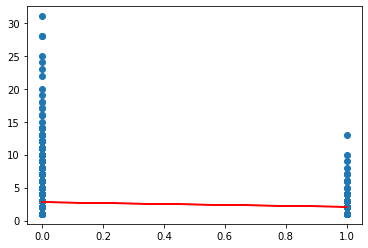

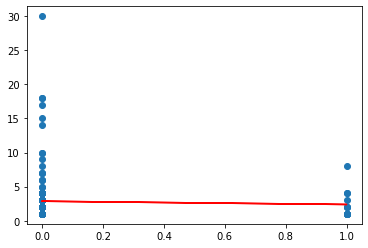

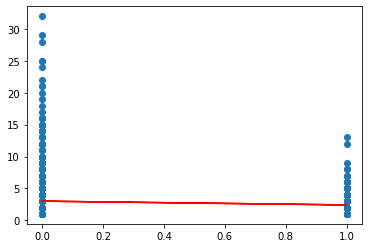

In [62]:
info.dropna()
info['y'] = info['y'].replace(['yes','no'],[1,0])

info_primary_loan = info.loc[(info["education"]=="primary") & (info["loan"]=="yes")]
info_primary_noloan = info.loc[(info["education"]=="primary") & (info["loan"]=="no")]
info_secondary_loan = info.loc[(info["education"]=="secondary") & (info["loan"]=="yes")]
info_secondary_noloan = info.loc[(info["education"]=="secondary") & (info["loan"]=="no")]
info_tertiary_loan = info.loc[(info["education"]=="tertiary") & (info["loan"]=="yes")]
info_tertiary_noloan = info.loc[(info["education"]=="tertiary") & (info["loan"]=="no")]
                                
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def regression(dataset):
    X = dataset.iloc[:,16].values.reshape(-1, 1)
    Y = dataset.iloc[:,12].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X,Y)
    Y_pred = linear_regressor.predict(X)
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color="red")
    plt.show()
    
regression(info_primary_loan)
regression(info_primary_noloan)
regression(info_secondary_loan)
regression(info_secondary_noloan)
regression(info_tertiary_loan)
regression(info_tertiary_noloan)

### Question 1.5
Assume that the campaign comes with the cost, of say 20 euros per contact, due to the salary paid to telemarketers. Given the current data, what's the total cost of this telemarketing campaign?

In [66]:
N_campaign = info["campaign"].sum()
Total = 20 * N_campaign
Total

252600

## Question 2 (35 points) Data Collection with API

Let's practise calling an API and navigating a JSON response!

---

### Question 2.1 Simple API call

There's an API for pretty much everything. Let's start with a super simple one: the [Breaking Bad quotes API](https://github.com/shevabam/breaking-bad-quotes) (alternatively, use the [Movie Quotes API](https://movie-quote-api.herokuapp.com/v1/quote/)).

For your convenience, we've included the simple syntax to do an HTTP request in Python and converted the response to a Python object as boilerplate code.

The goal here is to get a single, random Breaking Bad quote and print it out to the terminal. 

Go [here](https://github.com/shevabam/breaking-bad-quotes) to find out which URL you need to use. Make sure to carefully check out the data types you're getting back from the API and extract the string you need.

In [207]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://breaking-bad-quotes.herokuapp.com/v1/quotes"
page = requests.get(url)
page.content
soup = BeautifulSoup(page.content, 'html.parser')
quote = list(soup.children)[0]
quote

'[{"quote":"I am not in danger, Skyler. I AM the danger!","author":"Walter White"}]'


### Question 2.2 Looping over API results

Often APIs will serve a list of results that we need to loop over and manipulate. For this next example, we will use the [Star Wars API](https://swapi.dev).

First, go to the [documentation](https://swapi.dev/documentation) to find out which URL you're going to need to retrieve

In [161]:
url = "https://swapi.dev/api/people/"

Use `requests` to retrieve the people from the API. Store this in a `response` variable. What's the type of `response`?

In [162]:
response = requests.get(url)
type(response)

requests.models.Response

Loop over the **first 5 people** and print a sentence for each one, following this example:

- `Luke Skywalker has blue eyes`
- `C-3PO has yellow eyes`
- etc...

In [164]:
data

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

In [188]:
for i in range(6):
    data = response.json()
    rdata = data["results"][i]
    name = rdata["name"]
    eye_color = rdata["eye_color"]
    print(f"{name} has {eye_color} eyes")

Luke Skywalker has blue eyes
C-3PO has yellow eyes
R2-D2 has red eyes
Darth Vader has yellow eyes
Leia Organa has brown eyes
Owen Lars has blue eyes



### Question 2.3 Geocoding

A geocoding service is a tool to convert addresses to geo-coordinates and vice versa. We use them every time we fire up our GPS apps and look for a destination.

For this exercise, we will use the [Nominatim API](https://nominatim.openstreetmap.org/)

First, get familiar with the documentation, [which you will find here](https://nominatim.org/release-docs/latest/api/Overview/). Take a couple of minutes to read through and become familiar with it. In this exercise, we will need to find a set of geo-coordinates for a given address.

Use the API to find the latitude and longitude for this address: `10 Downing St, Westminster, London SW1A 2AA, United Kingdom`.

In [124]:
city = "q=10+Downing+St,+Westminster,+London+SW1A+2AA,+United+Kingdom"
aformat = "&format=json&limit=1" 
url = "https://nominatim.openstreetmap.org/search?"+city+aformat
page = requests.get(url)
data = page.json()

confirm_lat = data[0]["lat"]
confirm_lon= data[0]["lon"]
print(f"The latitude is {confirm_lat} and the longitude is {confirm_lon}.")

The latitude is 51.50344025 and the longitude is -0.12770820958562096.



### Question 2.4 Reverse Geocoding

Find the address belonging to this set of geo-coordinates: `{'lat': 38.8976633, 'lng': -77.036650 }`.
For that, define a function taking a latitude and a longitude as parameters, returning the coorrespondent address.

In [154]:
def address(lat,lon):
    url = "https://nominatim.openstreetmap.org/reverse?format=jsonv2&lat=" + str(lat) + "&lon=" + str(lon)
    page = requests.get(url)
    data = page.json()
    return data['display_name']

address(38.8976633,-77.036650)

'White House, 1600, Pennsylvania Avenue Northwest, Washington, District of Columbia, 20500, United States'



## Question 3 (35 points) SQL - Chinook

The Chinook data model represents a digital media store, including tables for artists, albums, media tracks, invoices, and customers. Media-related data was created using real data from an iTunes Library. Customer and employee information was manually created using fictitious names, addresses that can be located on Google maps, and other well-formatted data (phone, fax, email, etc.). Sales information is auto-generated using random data for 4 years.

The database schema is shown as below:

![](https://docs.yugabyte.com/images/sample-data/chinook/chinook-er-diagram.png)


You can find the `chinook.db` in the folder.

Answer the following questions with the SQL scripts on DBeaver, <strong> saving the .sql file with the answers </strong>.


### Question 3.1 

Show the names (first and last name) of the people from Portugal who bought in Portugal. Do not repeat the same name.

### Question 3.2 

Show the 5 shortest tracks and the second longest track.

### Question 3.3

Show all albums of U2 with two columns `Name` and `Title`.

### Question 3.4

Show the sales of songs (sum of quantity) categorized by genres with two columns: `Name` and `Sales`, alphabetically by name.

### Question 3.5

Which playlist contains the Pop songs with the most sales in the United States? Show the playlist Id and track name, album name, and artist name.